## TODO

* $D_x$ em função de $w_2$
  * Finalizado n deu em nada
* $D_x$ em função de $ky_2$
* $D_x$ em função de $kx_2$

Nada relevante, supostamente pq barreiras se formam quando kx1 e kx2 sao comensuraveis, e entre dois numeros racionais há infinitos racionais e irracionais, logo o grafico o grafico perde sentido.
 
* Entender assimtria do histrograma de saltos

# Notas a respeito do hamiltoniano

## Equações fundamentais:

Dado um certo hamiltoniano $H(q_i,p_i)$ onde $q_i$ e $p_i$ formam um par momento-coordenada então

$$\frac{dq}{dt} = \frac{\partial H}{\partial p}$$
$$\frac{dp}{dt} = -\frac{\partial H}{\partial q}$$

## Equaçoes principais:

* Hamiltoniano:
    $$H(x,y,t) = \frac{\phi(x,y,t)}{B_0} = \frac{1}{B_0} \left[ \phi_0(x) + \sum_i A_i sen(k_{xi}x)cos(k_{yi}y - \omega_i t) \right]$$

* Hamiltoniano pra uma onda: 
    $$H(x,y,t) = \phi_0(x) + A_1 sen(k_{x1}x)cos(k_{y1}y - \omega_1 t)$$

* Função geratriz da transformada: $F_2(x',y) = x'(y-v_1 t)$

* Hamiltoniano transformado: $$H(x,y) = \phi_0(x) - v_1x + A_1 sen(k_{x1}x)cos(k_{y1}y)$$
    $$\frac{dx}{dt} = k_{y1}A_i sen(k_{x1}x)sen(k_{y1}y)$$
    $$\frac{dy}{dt} =  \left[\frac{d\phi_0}{dx}  -  v_1\right] + k_{x1}A_i cos(k_{x1}x)cos(k_{y1}y)$$

* Hamiltoniano transformado para duas ondas:

    $$\frac{dx}{dt} = k_{y1}A_i sen(k_{x1}x)sen(k_{y1}y) + k_{y2}A_i sen(k_{x2}x)sen(k_{y2}(y-(\frac{\omega_2}{k_{y2}} - \frac{\omega_1}{k_{y1}} )t))$$
    $$\frac{dy}{dt} =  \left[\frac{d\phi_0}{dx}  -  v_1\right] + k_{x1}A_i cos(k_{x1}x)cos(k_{y1}y) + k_{x2}A_i cos(k_{x2}x)cos(k_{y2}(y-(\frac{\omega_2}{k_{y2}} - \frac{\omega_1}{k_{y1}} )t))$$

## Escolha dos parâmetros:

Na escolha dos parametros, temos a necessidade de periodicidade em $y$, dessa forma $$k_y = \frac{n\pi}{L_y}$$, com $L_y$ sendo comprimento do espaço em y. Em relação a $x$, em um problema que pode surgir ao usar duas ondas:

Se existir algum valor $x = x_b$ que satisfaça a condição

\begin{equation}
sen(k_{x1}x_b) = sen(k_{x2}x_b + \phi) = 0
\end{equation}

então temos uma barreira de transporte em $x = x_b$.

**Essa parte tem q ser refeita, mas basicametne os pontos hiperbolicos ao longo de x nao podem se alinhar se nao tem uma barreira lá.**

Pra resolver isso kx1 = kx2 = ky1 = ky2 e ai tem uma fase de $\pi/2$ em x p garantir que nao há barreiras.

## Plotagem de mapas:

Para criar o mapa do sistema perturbado com duas ondas, usaremos o período de oscilação da segunda onda, das equações acima. Dessa forma vemos que o termo que acopanha o termo temporal é $$-(\frac{\omega_2}{k_{y2}} - \frac{\omega_1}{k_{y1}})k_{y2}$$, que age de certa forma como a frequencia angular do sistema, dessa forma, o tempo de cada perturbação é dado como $$T = \frac{2\pi}{\omega'} = \frac{2\pi}{|\frac{\omega_2}{k_{y2}} - \frac{\omega_1}{k_{y1}}|k_{y2}}$$ e pensando no caso particular onde $$k_{y1} = k_{y2}$$ e $$\omega_1 \neq \omega_2$$, então $$T = \frac{2\pi}{|\omega_2 - \omega_1|}$$

### Mapa periodico:

Usando os k's escolhidos, o mapa nao somente é periodico em $2\pi$ mas também em $\frac{2\pi}{k}$, dos dando a opçao de estudar todo espaço de fase com apenas 4 células.



In [5]:
# General informations that would be used for the rest of the notetaking

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.colors
from IPython.display import HTML


plt.ioff() # isso é p n ficar mostrando as figuras sem eu querer
 
plt.rcParams["mathtext.fontset"] = "cm" # Fonte matemática pro latex
plt.rc('font', family='serif') # fonte tipo serif, p fica paredico com latex msm
plt.rc('text', usetex=False) # esse vc deixa True e for salvar em pdf e False se for p salvar png

rgb_light =  ['#ce5825ff','#2e9a60ff','#6182e2ff']
rgb_pallet = ['#cd4100ff','#007148ff','#4169E1ff']
rgb_darker = ['#9e3000ff','#005738ff','#304ea6ff']

cym_light =  ['#82e7ffff','#fde974ff','#ff98ffff']
cym_pallet = ['#00ceffff','#ffd700ff','#ff6dffff']
cym_pallet = ['#007a96ff','#b39700ff','#b04bb0ff']

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [rgb_pallet[2],"white",rgb_pallet[0]])
cmap_blues = matplotlib.colors.LinearSegmentedColormap.from_list("", [cym_pallet[2],rgb_darker[2]])

cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", [rgb_darker[2],"black",rgb_darker[0]])
cmap3 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ffffff00",rgb_pallet[2]])


# Variaveis que serao utilizadas:
pi = 3.1415
# Ly = 2pi e Lx = 1



In [71]:
# Animçao do que acontece para apenas uma onda
plt.ioff()
plt.clf
plt.close()


w = 3
kx = 3
ky = 3


def H1(grid_x,grid_y,t,A,w,ky,kx):
    return A*np.sin(kx*grid_x)*np.sin(ky*grid_y-w*t)

fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 

x = np.linspace(0,2*np.pi,300)
y = np.linspace(0,2*np.pi,300)
grid_x, grid_y = np.meshgrid(x,y)


t = np.linspace(0,2*pi/w,120)

def drawframe(t):
    ax.cla()
    ax.set_title("Aspecto geral: Uma onda pré transformada \n t=" + str(t))
    ax.set_ylabel(r"$x$")
    ax.set_xlabel(r"$y$")
    ax.pcolormesh(grid_y, grid_x,H1(grid_x,grid_y,t,1,w,ky,kx),cmap=cmap)

drawframe(0)
    
#ax.pcolormesh(grid_y, grid_x,np.sin(grid_x*grid_y*5 + n*0.1),cmap=cmap)

anim = animation.FuncAnimation(fig, drawframe, frames=t, interval=50)
#
HTML(anim.to_html5_video())




Rede de pontos hiperbolicos e elipticos


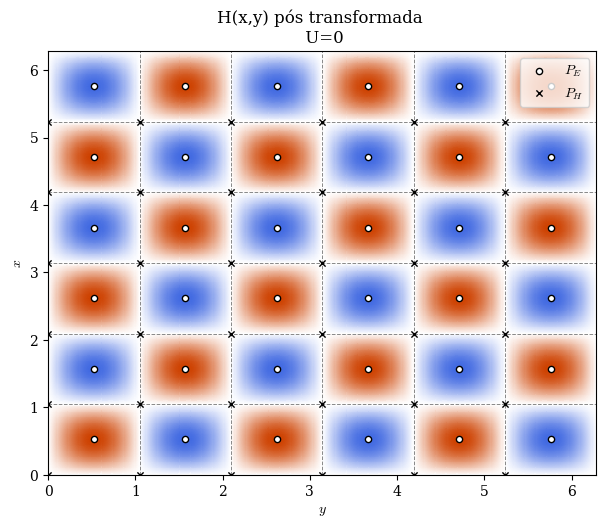

In [6]:
# Visualizaçao do hamiltoniano para apenas uma onda:
def H1(grid_x,grid_y,t,A,w,ky,kx):
    return A*np.sin(kx*grid_x)*np.sin(ky*grid_y-w*t)

def drawgrid(ax,M,N):
    for m in range(0,2*M+1): #kx
        ax.axhline(np.pi*m/M, color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 2)
    for n in range(0,2*N): #ky
        ax.axvline(n*pi/(N), color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 2)

plt.ioff()
plt.clf
plt.close()

N = 3
M = 3 
w = 3
kx = 3
ky = 3

fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_ylabel("$x$")
ax.set_xlabel("$y$")
ax.set_ylim(0,2*np.pi)
ax.set_xlim(0,2*np.pi)

## Fas o contorno colorido
x = np.linspace(0,2*np.pi,500)
y = np.linspace(0,2*np.pi,500)
grid_x, grid_y = np.meshgrid(x,y)
ax.pcolormesh(grid_y, grid_x,H1(grid_x,grid_y,0,1,w,ky,kx),cmap=cmap)

drawgrid(ax,kx,ky) # desenha o limite das celulas
#ax.contour(grid_y, grid_x,H1(grid_x,grid_y,0,1,w,ky,kx),cmap=cmap, levels = 9)


## Pontos PE
x = np.array([])
y = np.array([])
for m in range(0,2*M):
    x = np.append(x,(2*m+1)*pi/(2*M))
for n in range(0,2*N):
    y = np.append(y,(2*n+1)*pi/(2*N))
grid_x, grid_y = np.meshgrid(x,y)
ax.scatter(grid_y,grid_x, s = 40, color = '#ffffff',edgecolor = "black", zorder = 3, label = r"$P_E$")



## Pontos PH
x = np.array([])
y = np.array([])
for m in range(0,2*M):
    x = np.append(x,np.pi*m/M)
for n in range(0,2*N):     
    y = np.append(y,n*pi/N)

grid_x, grid_y = np.meshgrid(x,y)
ax.scatter(grid_x,grid_y, s = 20, color = '#000000',marker="x",linewidth = 1, edgecolor = "#ffffff", zorder = 3, label = r"$P_H$")

print("Rede de pontos hiperbolicos e elipticos")
ax.set_title("H(x,y) pós transformada \n U=0")
ax.legend()
plt.show()
plt.close()


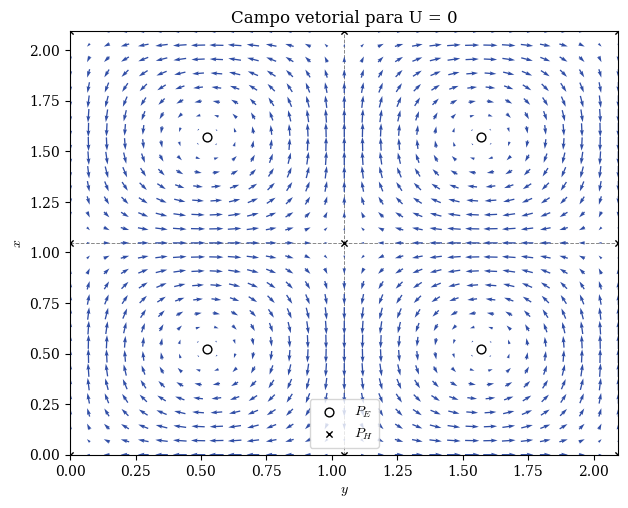

In [112]:
# Visualizaçao do hamiltoniano para apenas uma onda:
def dx(grid_x,grid_y,A,w,ky,kx):
    return -A*ky*np.cos(ky*grid_y)*np.sin(kx*grid_x)

def dy(grid_x,grid_y,A,w,ky,kx):
    return A*kx*np.sin(ky*grid_y)*np.cos(kx*grid_x)

def drawgrid(ax,M,N):
    for m in range(0,2*M+1): #kx
        ax.axhline(np.pi*m/M, color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 0)
    for n in range(0,2*N): #ky
        ax.axvline(n*pi/(N), color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 0)

plt.ioff()
plt.clf
plt.close()

N = 3
M = 3
w = 3
kx = 3
ky = 3
A = 1

fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_ylabel("$x$")
ax.set_xlabel("$y$")
ax.set_ylim(0,2*np.pi/kx,31)
ax.set_xlim(0,2*np.pi/kx,31)

drawgrid(ax,kx,ky) # desenha o limite das celulas

## Pontos PE
x = np.array([])
y = np.array([])
for m in range(0,2*M):
    x = np.append(x,(2*m+1)*pi/(2*M))
for n in range(0,2*N):
    y = np.append(y,(2*n+1)*pi/(2*N))
grid_x, grid_y = np.meshgrid(x,y)
ax.scatter(grid_y,grid_x, s = 40, color = '#ffffff',edgecolor = "black", zorder = 3, label = r"$P_E$")

## Pontos PH
x = np.array([])
y = np.array([])
for m in range(0,2*M):
    x = np.append(x,np.pi*m/M)
for n in range(0,2*N):     
    y = np.append(y,n*pi/N)

grid_x, grid_y = np.meshgrid(x,y)
ax.scatter(grid_x,grid_y, s = 20, color = '#000000',marker="x",linewidth = 1, edgecolor = "#ffffff", zorder = 3, label = r"$P_H$")

x = np.linspace(0,2*np.pi/kx,31)
y = np.linspace(0,2*np.pi/ky,31)
grid_x, grid_y = np.meshgrid(x,y)

dxdt = dx(grid_x,grid_y,A,w,ky,kx)
dydt = dy(grid_x,grid_y,A,w,ky,kx)
mod = np.sqrt(dxdt**2 + dydt**2)


## Plota o quiver mesmo

ax.quiver(grid_x,grid_y,dxdt,dydt, color = rgb_darker[2],pivot='mid')

ax.set_title("Campo vetorial para U = 0")
ax.legend()
plt.show()
plt.close()


In [6]:
# Animçao do que acontece para duas onda

plt.ioff()
plt.clf
plt.close()

def H(grid_x,grid_y,t,A,w,ky,kx,c_w,phases):
    R = 0
    for i in range(0,len(A)):
        R += A[i]*np.sin(kx[i]*grid_x + phases[i])*np.sin(ky[i]*(grid_y-(w[i]/ky[i] - w[c_w]/ky[c_w])*t))
    return R


def drawgrid(ax,M,N):
    for m in range(0,2*M+1): #kx
        ax.axhline(np.pi*m/M, color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 2)
    for n in range(0,2*N): #ky
        ax.axvline(n*pi/(N), color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 2)


N = 3
A = [1,0.2]
w = [N,2*N]
kx = [N,N] 
ky = [N,N]
phases = [0,np.pi/2]


plt.clf()
fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_ylabel(r"$x$")
ax.set_xlabel(r"$y$")
#ax.set_ylim(-pi,pi)
#ax.set_xlim(-pi,pi)

x = np.linspace(0,2*pi,601)
y = np.linspace(0,2*pi,601)
grid_x, grid_y = np.meshgrid(x,y)

cw = 0
t = np.linspace(0,2*pi/(ky[1]*(w[1]/ky[1] - w[cw]/ky[cw])),120)

def drawframe(t):
    #print(t)
    ax.cla()
    ax.pcolormesh(grid_y, grid_x,H(grid_x,grid_y,t,A,w,ky,kx,cw,phases),cmap=cmap)
    drawgrid(ax,N,N)
    ax.set_title("H(x,y,t) para duas ondas")
    #ax.contour(grid_y, grid_x,H(grid_x,grid_y,t,A,w,ky,kx,cw),cmap=cmap2, levels = 17)
anim = animation.FuncAnimation(fig, drawframe, frames=t, interval=10)
HTML(anim.to_html5_video())

In [140]:
## Condinuação da celula de cima
plt.clf()
fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_ylabel(r"$x$")
ax.set_xlabel(r"$y$")
#ax.set_ylim(-pi,pi)
#ax.set_xlim(-pi,pi)

x = np.linspace(0,2*pi/kx[0],601)
y = np.linspace(0,2*pi/ky[0],601)
grid_x, grid_y = np.meshgrid(x,y)

cw = 0
t = np.linspace(0,2*pi/(ky[1]*(w[1]/ky[1] - w[cw]/ky[cw])),120)

def drawframe(t):
    #print(t)
    ax.cla()
    z = H(grid_x,grid_y,t,A,w,ky,kx,cw,phases)
    ax.pcolormesh(grid_y, grid_x,z,cmap=cmap)
    ax.contour(grid_y, grid_x,z,cmap=cmap2, levels = 5,zorder = 3)

    ax.axhline(np.pi*1/N, color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 2)
    ax.axvline((2*1+1)*pi/(2*N), color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 2)
    ax.axvline((2*0+1)*pi/(2*N), color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 2)

    ax.set_title("H(x,y,t) para duas ondas")
    #ax.contour(grid_y, grid_x,H(grid_x,grid_y,t,A,w,ky,kx,cw),cmap=cmap2, levels = 17)

anim = animation.FuncAnimation(fig, drawframe, frames=t, interval=10)
HTML(anim.to_html5_video())

TypeError: 'Symbol' object is not subscriptable

In [8]:
## Teste das wavelets

def wavelet(A,x,t,sigma,wg,kg,wf,kf):
    return A*np.exp(-0.5*(kg*x-wg*t)**2/(sigma*sigma))*np.cos(kf*x-wf*t)

fig, ax = plt.subplots()
plt.ioff()
fig.set_size_inches(18*0.393, 7*0.393) # diminuir na metade p 
ax.set_ylabel(r"$f(x)$")
ax.set_xlabel(r"$x$")

x = np.linspace(-pi,pi,101)



#ax.plot(x,wavelet(1,x,0,0.5,1))
#plt.show()

t = np.linspace(-pi,pi,240)


sigma = 0.5
def drawframe(t): # Define uma funçao que vai plotar cada frame
    #print(t)
    t = t%pi
    ax.cla() # limpa os dados anteriores
    ax.set_title(str(t))
    ax.set_ylim(-1,1) # ajeita os limites
    ax.set_xlim(-pi,pi)
    ax.plot(x,wavelet(1,x,t,sigma,1,1,1,1))

# Ai vc cria um objeto com essa funçao aq em baixo:
# fig é o objeto figura do matplotlib, drawframe é a funçao q plota
#   frames é o arrary q vc vai iterar p animaçao
#   interval é o tempo entre cada frame, 20 da 60 fps se n me engano
anim = animation.FuncAnimation(fig, drawframe, frames=t, interval=20)

# Usa esse comando aq p fazer de fato o vídeo
HTML(anim.to_html5_video())



In [10]:
## Animação perturbação wavelet em x-y:

plt.clf
plt.close()

def Hwavelet(x,y,t,sigma,A,kx,wg,kg,wf,kf):
    return A*np.cos(kx*x)*np.exp(-0.5*(((kg*y-wg*t)))**2)/(2*sigma*sigma)*np.cos(kf*y-wf*t)

def wavelet(A,x,t,sigma,wg,kg,wf,kf):
    return A*np.exp(-0.5*(kg*x-wg*t)*(kg*x-wg*t)/(2*sigma*sigma))*np.cos(kf*x-wf*t)

def envelope(A,x,t,sigma,wg,kg,wf,kf):
    return A*np.exp(-0.5*(kg*x-wg*t)*(kg*x-wg*t)/(2*sigma*sigma))

def H1(grid_x,grid_y,t,A,w,ky,kx):
    return A*np.sin(kx*grid_x)*np.cos(ky*grid_y-w*t)

A = 1
w = 1
kx = M*pi 
ky = N
wf = 4
kf = ky



plt.clf()
fig, ax = plt.subplots()
fig.set_size_inches(18*0.393, 14*0.393) # diminuir na metade p 
ax.set_ylabel(r"$x$")
ax.set_xlabel(r"$y$")
ax.set_ylim(0,1.1)
ax.set_xlim(-pi,pi)

x = np.linspace(0,1,100)
y = np.linspace(-pi,pi,100)
grid_x, grid_y = np.meshgrid(x,y)

t = np.linspace(-5,5,340)

def drawframe(t):
    #print(t)
    ax.cla()
    ax.pcolormesh(grid_y, grid_x,H1(grid_x,grid_y,0,1,1,ky,kx) + Hwavelet(grid_x,grid_y,t,1,0.5,kx*np.sqrt(7),2,ky,2,ky),cmap=cmap,vmax=1.5,vmin=-1.5)

anim = animation.FuncAnimation(fig, drawframe, frames=t, interval=20)

HTML(anim.to_html5_video())



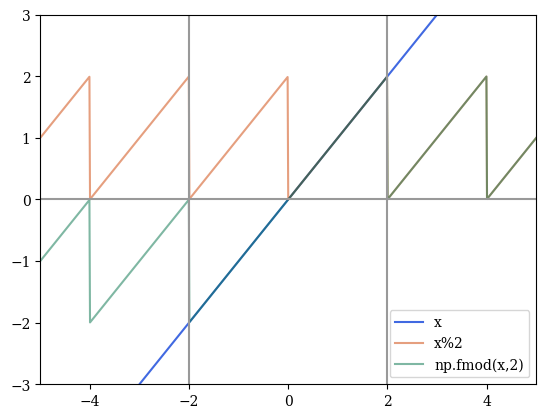

In [16]:
## Teste de função mod pra periodicidade
x = np.linspace(-6,6,1001)
import math as mt
plt.close()

fig, ax = plt.subplots()
ax.plot(x,x,color = rgb_pallet[2], label = "x")
ax.plot(x,x%2,color = rgb_pallet[0], label = "x%2",alpha = 0.5)
ax.plot(x,np.fmod(x,2),color = rgb_pallet[1], label = "np.fmod(x,2)",alpha = 0.5)

ax.set_xlim(-5,5)
ax.set_ylim(-3,3)
ax.axvline(+2, color = "#999999")
ax.axvline(-2, color = "#999999")
ax.axhline(0, color = "#999999")
ax.legend()
plt.show()

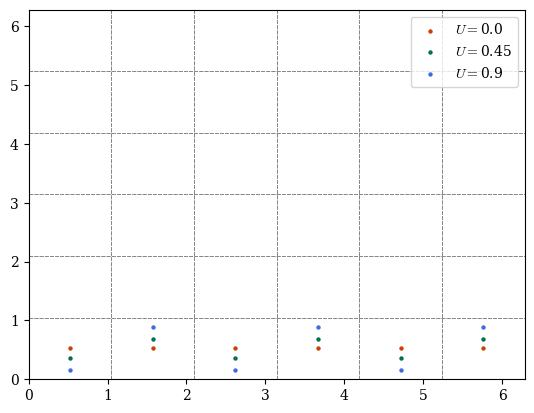

In [119]:
## Pontos elipticos variando U


def drawgrid(ax,M,N):
    for m in range(0,2*M+1): #kx
        ax.axhline(np.pi*m/M, color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 0)
    for n in range(0,2*N): #ky
        ax.axvline(n*pi/(N), color = '#888888', linestyle = "--", linewidth = 0.7, zorder = 0)
def f(x,ky,kx,U):
    return np.arccos(U/(np.sin(kx*x)))/ky

t = 0
plt.close()
fig, ax = plt.subplots()
kx = 3
ky = 3
Us = np.linspace(0,0.9,3)

for i in range(0,len(Us)):
    x = np.arange(np.pi/(kx),2*np.pi,np.pi/(kx))-np.pi/(2*kx)
    y = f(x,ky,kx,Us[i])
    ax.scatter(x,y,s=10, color = rgb_pallet[i],lw = 0,zorder = 0, label = r"$U=$" + str(Us[i]))
    drawgrid(ax,3,3)
    ax.set_ylim(0,2*np.pi)
    ax.set_xlim(0,2*np.pi)

ax.legend()
plt.show()


In [2]:
# Calculo da estabilidade dos pontos extremos do sistema para uma onda

import sympy as sp
from IPython.display import display, Math
sp.init_printing()

x, y, kx, ky, A, B = sp.symbols("x y k_x k_y A B",real=True)
ve, v1 = sp.symbols("ve v1", real=True)
H = sp.sin(kx*x)*sp.sin(ky*y)*A/B
xdot = -sp.diff(H,y)
ydot = sp.diff(H,x)
display(H)
display(xdot)
display(ydot)


x1 ,y1 = sp.symbols("x_1 y_1")
x2 ,y2 = sp.symbols("x_2 y_2")

m, n = sp.symbols("m n", integer = True)


C11 = sp.diff(xdot,x)
C12 = sp.diff(xdot,y)
C21 = sp.diff(ydot,x)
C22 = sp.diff(ydot,y)
J = sp.Matrix([[C11,C12],[C21,C22]])
print("Jacobiana")
display(J)

x1 = m*sp.pi/kx
y1 = n*sp.pi/ky
J1 = J.subs(x,x1)
J1 = J1.subs(y,y1)
print("Autovalores para")
display(Math(r"p = (\frac{m\pi}{kx};\frac{n\pi}{ky})"))
display(J1.eigenvects())
print("Como temos autovalores puramente reais, com ao menos um dele sendo positivo, temos um ponto instavel, que vem a ser de sela, devido ao sinal oposto do outro autovalor")


x2 = (2*m+1)*sp.pi/(2*kx)
y2 = (2*n+1)*sp.pi/(2*ky)
J2 = J.subs(x,x2)
J2 = J2.subs(y,y2)
print("Autovalores para")
display(Math(r"p = (\frac{(2m+1)\pi}{2kx};\frac{(2n+1)\pi}{2ky})"))
display(J2.eigenvects())
print("Como a parte real é nula, e os autovalroes sao puramente imaginarios, temos pontos elipticos estáveis")


Jacobiana


⎡                                       2                      ⎤
⎢-A⋅kₓ⋅k_y⋅cos(kₓ⋅x)⋅cos(k_y⋅y)    A⋅k_y ⋅sin(kₓ⋅x)⋅sin(k_y⋅y) ⎥
⎢───────────────────────────────   ─────────────────────────── ⎥
⎢               B                               B              ⎥
⎢                                                              ⎥
⎢      2                                                       ⎥
⎢ -A⋅kₓ ⋅sin(kₓ⋅x)⋅sin(k_y⋅y)     A⋅kₓ⋅k_y⋅cos(kₓ⋅x)⋅cos(k_y⋅y)⎥
⎢ ────────────────────────────    ─────────────────────────────⎥
⎣              B                                B              ⎦

Autovalores para


<IPython.core.display.Math object>

⎡⎛     m     n                    ⎞  ⎛    m     n                   ⎞⎤
⎢⎜-(-1) ⋅(-1) ⋅A⋅kₓ⋅k_y      ⎡⎡1⎤⎤⎟  ⎜(-1) ⋅(-1) ⋅A⋅kₓ⋅k_y     ⎡⎡0⎤⎤⎟⎥
⎢⎜──────────────────────, 1, ⎢⎢ ⎥⎥⎟, ⎜────────────────────, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝          B                ⎣⎣0⎦⎦⎠  ⎝         B               ⎣⎣1⎦⎦⎠⎦

Como temos autovalores puramente reais, com ao menos um dele sendo positivo, temos um ponto instavel, que vem a ser de sela, devido ao sinal oposto do outro autovalor
Autovalores para


<IPython.core.display.Math object>

⎡⎛                 ⎡⎡    -m     -n      ⎤⎤⎞  ⎛               ⎡⎡     -m     -n 
⎢⎜                 ⎢⎢(-1)  ⋅(-1)  ⋅ⅈ⋅k_y⎥⎥⎟  ⎜               ⎢⎢-(-1)  ⋅(-1)  ⋅
⎢⎜-ⅈ⋅A⋅kₓ⋅k_y      ⎢⎢───────────────────⎥⎥⎟  ⎜ⅈ⋅A⋅kₓ⋅k_y     ⎢⎢───────────────
⎢⎜────────────, 1, ⎢⎢         kₓ        ⎥⎥⎟, ⎜──────────, 1, ⎢⎢          kₓ   
⎢⎜     B           ⎢⎢                   ⎥⎥⎟  ⎜    B          ⎢⎢               
⎣⎝                 ⎣⎣         1         ⎦⎦⎠  ⎝               ⎣⎣          1    

      ⎤⎤⎞⎤
ⅈ⋅k_y ⎥⎥⎟⎥
──────⎥⎥⎟⎥
      ⎥⎥⎟⎥
      ⎥⎥⎟⎥
      ⎦⎦⎠⎦

Como a parte real é nula, e os autovalroes sao puramente imaginarios, temos pontos elipticos estáveis


In [18]:
import sympy as sp
from IPython.display import display, Math
sp.init_printing()


x, y, B = sp.symbols("x y B",real=True)
ky1 = sp.symbols("k_{y1}",integer=True)
ky2 = sp.symbols("k_{y2}",integer=True)

phase = sp.symbols("\phi_y",real = True)


solutions = sp.solve([sp.sin(ky1), sp.sin(ky2 + phase)], phase)

solutions

